<h1> 18BCS6150 </h1>
<h3> 18BCS6150 </h3>
<b> Robin Duhan </b>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

<b> Reading and understanding the data </b>

In [4]:
dataset = pd.read_csv("D:/Data/train.csv")

In [5]:
dataset.shape

(42000, 785)

In [6]:
y = dataset.iloc[:,0].values
x = dataset.iloc[:,1:].values

x = x.astype('float32')
y = y.astype('float32')

<b> Scalling the data and chossing 10 percent of the data for out modek </b>

In [20]:
#Stadard scalling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)

In [8]:
y.shape

(42000,)

In [9]:
x = x[0:12000][:]
y = y[0:12000]

In [10]:
x.shape

(12000, 784)

<b> Splitting the dataset into training and testing set </b>

In [11]:
#Splitting the dataset
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 0,test_size = 0.2)

In [12]:
x_train.shape

(9600, 784)

In [13]:
x_test.shape

(2400, 784)

<h3> Linear Model </h3>

In [14]:
#First building a linear SVM model

from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

model_linear = SVC(kernel='linear')
model_linear.fit(x_train, y_train)

SVC(kernel='linear')

In [15]:
y_pred = model_linear.predict(x_test)

In [16]:
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")
# cm
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))


accuracy: 0.9133333333333333 

[[199   0   2   1   1   2   0   0   2   0]
 [  0 257   1   0   2   0   1   0   1   1]
 [  0   4 233   3   2   2   1   2   6   1]
 [  0   2   4 225   0  10   0   2   4   1]
 [  0   0   1   0 217   0   1   0   0   5]
 [  2   1   6  15   1 206   2   1   5   1]
 [  2   0   3   0   2   4 244   0   2   0]
 [  0   2   3   2   9   0   0 237   0  11]
 [  3   4   3   9   2   7   4   1 188   2]
 [  0   1   4   1  13   1   0  12   2 186]]


<b> Accuracy of 91 percent when trained on 10 percent data </b>

<h3> Non Linear SVC model </h3>

In [17]:
non_linear_model = SVC(kernel='rbf')
# fit
non_linear_model.fit(x_train, y_train)

SVC()

In [18]:
y_pred = non_linear_model.predict(x_test)

print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")
# cm
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

accuracy: 0.935 

[[195   0   3   0   1   1   4   0   3   0]
 [  0 259   2   0   1   0   1   0   0   0]
 [  0   2 236   5   2   0   2   2   5   0]
 [  0   1   3 233   0   2   0   2   6   1]
 [  0   0   5   0 214   0   0   3   0   2]
 [  1   1   2   6   2 223   3   0   1   1]
 [  2   0   5   0   2   3 243   0   2   0]
 [  0   1   5   1   6   0   0 245   0   6]
 [  2   2   6   4   2   2   2   0 201   2]
 [  2   1   6   2   7   1   0   6   0 195]]


<b> With rbf kernal, it gives us 93.5 percent accuracy </b>

In [50]:
#Finding the optimal hyperparameters


folds = KFold(n_splits = 5, shuffle = True, random_state = 101)
# specify range of hyperparameters
# Set the parameters by cross-validation
hyper_params = [ {'gamma': [1e-2, 1e-3, 1e-4],'C': [1, 10, 100, 1000]}]
# specify model
model = SVC(kernel="rbf")
# set up GridSearchCV()
model_cv = GridSearchCV(estimator = model,param_grid = hyper_params,scoring= 'accuracy',
                        cv = folds,verbose = 1,return_train_score=True)
# fit the model
model_cv.fit(x_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed: 112.5min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=101, shuffle=True),
             estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000],
                          'gamma': [0.01, 0.001, 0.0001]}],
             return_train_score=True, scoring='accuracy', verbose=1)

In [51]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,121.766308,2.362836,16.457411,0.176950,1,0.01,"{'C': 1, 'gamma': 0.01}",0.774479,0.753646,0.744792,...,0.753125,0.011794,12,0.999609,0.999740,0.999740,0.999740,0.999870,0.999740,0.000082
1,28.594793,0.350212,9.216278,0.097729,1,0.001,"{'C': 1, 'gamma': 0.001}",0.932292,0.931250,0.932292,...,0.932396,0.004172,4,0.975000,0.975651,0.974740,0.975260,0.975391,0.975208,0.000315
2,41.896903,0.774344,12.737310,0.026300,1,0.0001,"{'C': 1, 'gamma': 0.0001}",0.906250,0.903646,0.906771,...,0.907396,0.003080,8,0.920312,0.916797,0.921224,0.918880,0.919271,0.919297,0.001495
3,124.180518,1.060081,16.536605,0.104638,10,0.01,"{'C': 10, 'gamma': 0.01}",0.786979,0.772917,0.766146,...,0.770729,0.010160,9,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
4,24.608334,0.287328,8.309137,0.081979,10,0.001,"{'C': 10, 'gamma': 0.001}",0.945312,0.943229,0.943229,...,0.944063,0.005002,1,0.998958,0.999349,0.998828,0.998958,0.999219,0.999062,0.000191
5,18.980503,0.212262,7.696146,0.048041,10,0.0001,"{'C': 10, 'gamma': 0.0001}",0.925000,0.923438,0.926042,...,0.926979,0.006245,6,0.960677,0.960547,0.959375,0.962240,0.961458,0.960859,0.000959
6,125.363044,1.453718,16.516605,0.124751,100,0.01,"{'C': 100, 'gamma': 0.01}",0.786979,0.772917,0.766146,...,0.770729,0.010160,9,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
7,24.249794,0.138175,8.277536,0.065603,100,0.001,"{'C': 100, 'gamma': 0.001}",0.944792,0.944271,0.942187,...,0.943854,0.004857,2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
8,14.588203,0.398590,6.258735,0.101117,100,0.0001,"{'C': 100, 'gamma': 0.0001}",0.930729,0.929167,0.926562,...,0.929479,0.002150,5,0.994010,0.994792,0.993490,0.994141,0.992839,0.993854,0.000656
9,121.687888,0.906344,16.377435,0.063579,1000,0.01,"{'C': 1000, 'gamma': 0.01}",0.786979,0.772917,0.766146,...,0.770729,0.010160,9,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000


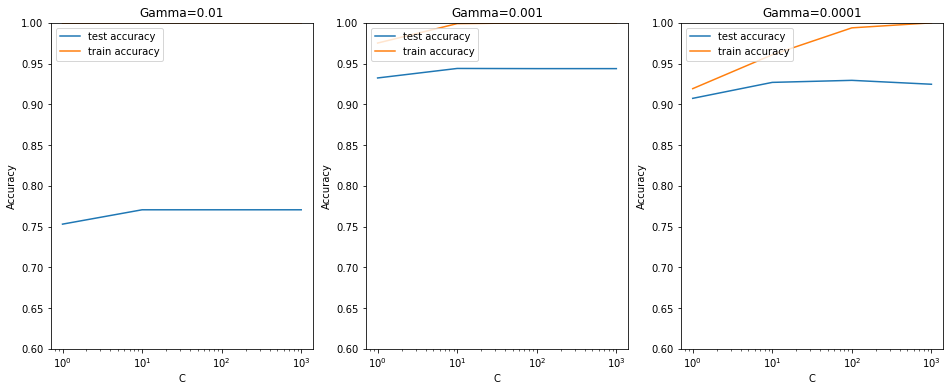

In [53]:

#Plotting the graphs of the different hyperparameters

import matplotlib.pyplot as plt
cv_results['param_C'] = cv_results['param_C'].astype('int')
# # plotting
plt.figure(figsize=(16,6))
# subplot 1/3
plt.subplot(131)
gamma_01 = cv_results[cv_results['param_gamma']==0.01]
plt.plot(gamma_01["param_C"], gamma_01["mean_test_score"])
plt.plot(gamma_01["param_C"], gamma_01["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.01")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')
# subplot 2/3
plt.subplot(132)
gamma_001 = cv_results[cv_results['param_gamma']==0.001]
plt.plot(gamma_001["param_C"], gamma_001["mean_test_score"])
plt.plot(gamma_001["param_C"], gamma_001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.001")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')
# subplot 3/3
plt.subplot(133)
gamma_0001 = cv_results[cv_results['param_gamma']==0.0001]
plt.plot(gamma_0001["param_C"], gamma_0001["mean_test_score"])
plt.plot(gamma_0001["param_C"], gamma_0001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.0001")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')


<h4> Best params, {'C': 10, 'gamma': 0.001} </h4>

In [54]:
#Best score as is visble from the plot as well
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_
print(best_hyperparams)

{'C': 10, 'gamma': 0.001}


<b> Final Model with best params </b>

In [19]:
#Final Model with best parameters
model = SVC(C=10, gamma=0.001, kernel="rbf")
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
# metrics
print("accuracy", metrics.accuracy_score(y_test, y_pred), "\n")
print(metrics.confusion_matrix(y_test, y_pred), "\n")


accuracy 0.9483333333333334 

[[199   0   1   0   1   1   2   0   3   0]
 [  0 259   2   0   2   0   0   0   0   0]
 [  0   3 242   4   2   0   0   0   3   0]
 [  0   0   3 236   0   2   0   2   3   2]
 [  0   0   3   1 215   0   1   1   0   3]
 [  1   2   3   6   1 223   3   0   1   0]
 [  3   0   6   0   1   3 244   0   0   0]
 [  0   1   2   2   4   0   0 251   1   3]
 [  1   1   3   3   3   1   2   0 207   2]
 [  1   2   5   1   7   1   0   2   1 200]] 



<h3> Final accuracy is 94.8 percent and we only trained on 10 percent of the data <h3>